# Task 3: Employee Salary Prediction using Multiple Regression

## Objective
Organisations rely on predictive analytics to determine fair and competitive salaries based on employee attributes. Machine learning models help identify salary trends and ensure data-driven compensation decisions.

In this notebook, we will:
1. Load and explore the employee salary dataset
2. Preprocess data including encoding categorical variables
3. Build a predictive model using multiple regression techniques
4. Analyze coefficients and their significance
5. Achieve a good R² score
6. Answer the assignment questions about feature influence and practical implications

### Dataset Features:
- **Experience**: Years of experience
- **Education**: Education level
- **Age**: Employee age
- **Location**: City/Location
- **Role**: Job role
- **Salary**: Target variable

---
## 1. Import Required Libraries

In [16]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Statistical analysis
import statsmodels.api as sm
from scipy import stats

# Settings
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)

print("All libraries imported successfully!")

All libraries imported successfully!


---
## 2. Load and Explore the Dataset

In [17]:
# Load the employee salary dataset
df = pd.read_csv('../Task_3_Assets/employee_salary_dataset.csv')

# Display basic information
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"\nShape of dataset: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"\nColumn names: {df.columns.tolist()}")
print("\n" + "="*60)
print("FIRST 10 ROWS")
print("="*60)
df.head(10)

DATASET OVERVIEW

Shape of dataset: 1500 rows, 6 columns

Column names: ['Experience', 'Education', 'Age', 'Location', 'Role', 'Salary']

FIRST 10 ROWS


,Experience,Education,Age,Location,Role,Salary
0,7,Bachelor's,56,New York,Software Engineer,78856.820000
1,20,High School,28,Austin,Software Engineer,71947.203460
2,29,PhD,42,Chicago,Software Engineer,111659.840176
3,15,High School,39,Chicago,Software Engineer,70258.290207
4,11,High School,24,New York,Software Engineer,77946.277878
5,8,High School,32,San Francisco,Data Scientist,66238.106687
6,29,Master's,45,Austin,Manager,110582.247685
7,21,Master's,40,Austin,Software Engineer,98480.190000
8,7,Bachelor's,25,New York,Software Engineer,72800.028371
9,26,Bachelor's,47,Austin,HR,103069.424003


In [18]:
# Check data types and missing values
print("DATA TYPES AND NON-NULL COUNTS")
print("="*60)
print(df.info())

print("\n" + "="*60)
print("MISSING VALUES")
print("="*60)
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values found!")

print("\n" + "="*60)
print("STATISTICAL SUMMARY")
print("="*60)
df.describe()

DATA TYPES AND NON-NULL COUNTS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Experience  1500 non-null   int64  
 1   Education   1500 non-null   object 
 2   Age         1500 non-null   int64  
 3   Location    1500 non-null   object 
 4   Role        1500 non-null   object 
 5   Salary      1500 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 70.4+ KB
None

MISSING VALUES
No missing values found!

STATISTICAL SUMMARY


,Experience,Age,Salary
count,1500.000000,1500.000000,1500.000000
mean,15.036000,40.872000,92787.729972
std,8.629273,10.949622,22744.131080
min,1.000000,22.000000,23521.509071
25%,7.000000,32.000000,75828.432563
50%,15.000000,41.000000,92792.241050
75%,23.000000,50.000000,108742.245265
max,29.000000,59.000000,152270.490382


In [19]:
# Explore categorical variables
print("CATEGORICAL VARIABLE DISTRIBUTIONS")
print("="*60)

categorical_cols = ['Education', 'Location', 'Role']
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

CATEGORICAL VARIABLE DISTRIBUTIONS

Education:
Education
High School    394
Bachelor's     386
Master's       365
PhD            355
Name: count, dtype: int64

Location:
Location
Austin           391
New York         376
Chicago          371
San Francisco    362
Name: count, dtype: int64

Role:
Role
HR                   384
Data Scientist       380
Manager              379
Software Engineer    357
Name: count, dtype: int64


---
## 3. Exploratory Data Analysis (EDA)

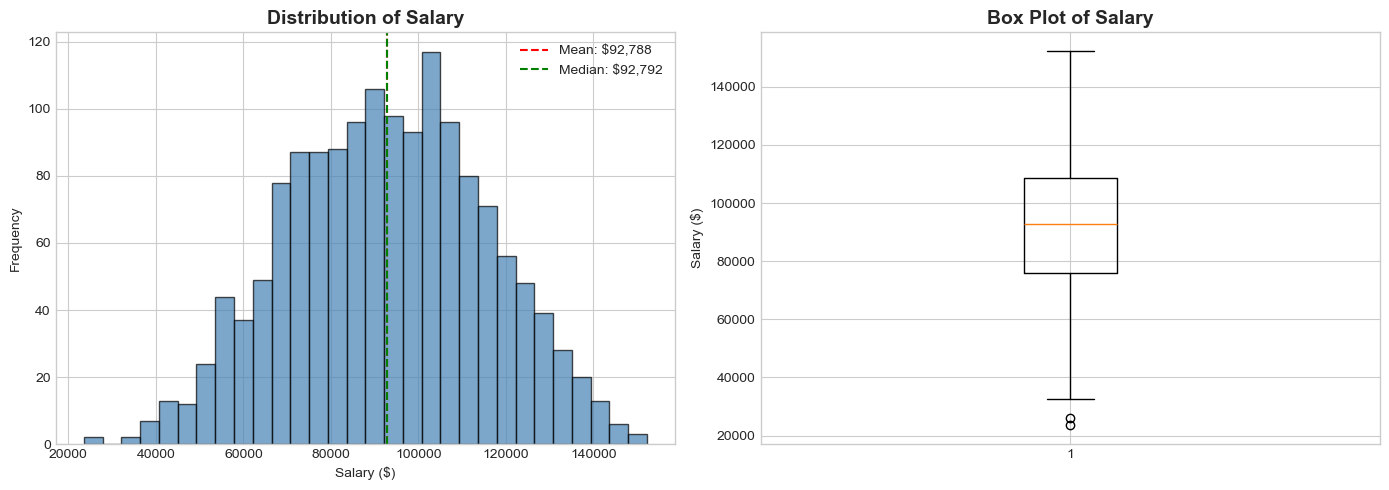


Salary Statistics:
  Mean: $92,787.73
  Median: $92,792.24
  Std Dev: $22,744.13


In [20]:
# Distribution of target variable (Salary)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['Salary'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Salary', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Salary ($)')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['Salary'].mean(), color='red', linestyle='--', label=f'Mean: ${df["Salary"].mean():,.0f}')
axes[0].axvline(df['Salary'].median(), color='green', linestyle='--', label=f'Median: ${df["Salary"].median():,.0f}')
axes[0].legend()

# Box plot
axes[1].boxplot(df['Salary'], vert=True)
axes[1].set_title('Box Plot of Salary', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Salary ($)')

plt.tight_layout()
plt.show()

print(f"\nSalary Statistics:")
print(f"  Mean: ${df['Salary'].mean():,.2f}")
print(f"  Median: ${df['Salary'].median():,.2f}")
print(f"  Std Dev: ${df['Salary'].std():,.2f}")

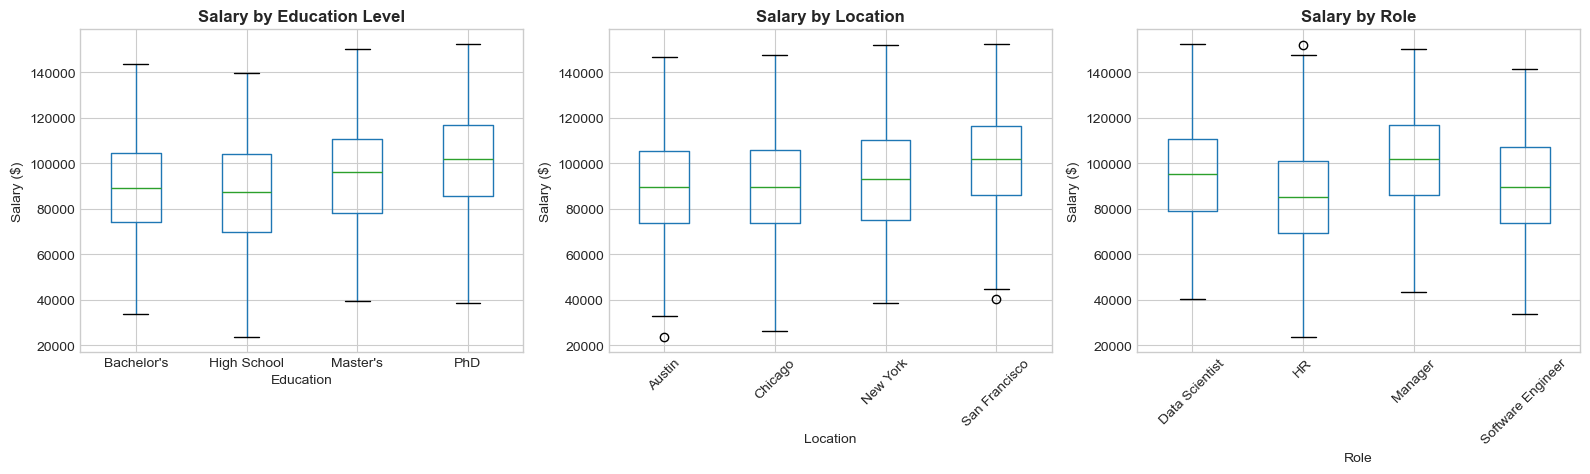

In [21]:
# Salary by categorical variables
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Salary by Education
df.boxplot(column='Salary', by='Education', ax=axes[0])
axes[0].set_title('Salary by Education Level', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Education')
axes[0].set_ylabel('Salary ($)')

# Salary by Location  
df.boxplot(column='Salary', by='Location', ax=axes[1])
axes[1].set_title('Salary by Location', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Location')
axes[1].set_ylabel('Salary ($)')
axes[1].tick_params(axis='x', rotation=45)

# Salary by Role
df.boxplot(column='Salary', by='Role', ax=axes[2])
axes[2].set_title('Salary by Role', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Role')
axes[2].set_ylabel('Salary ($)')
axes[2].tick_params(axis='x', rotation=45)

plt.suptitle('')  # Remove automatic title
plt.tight_layout()
plt.show()

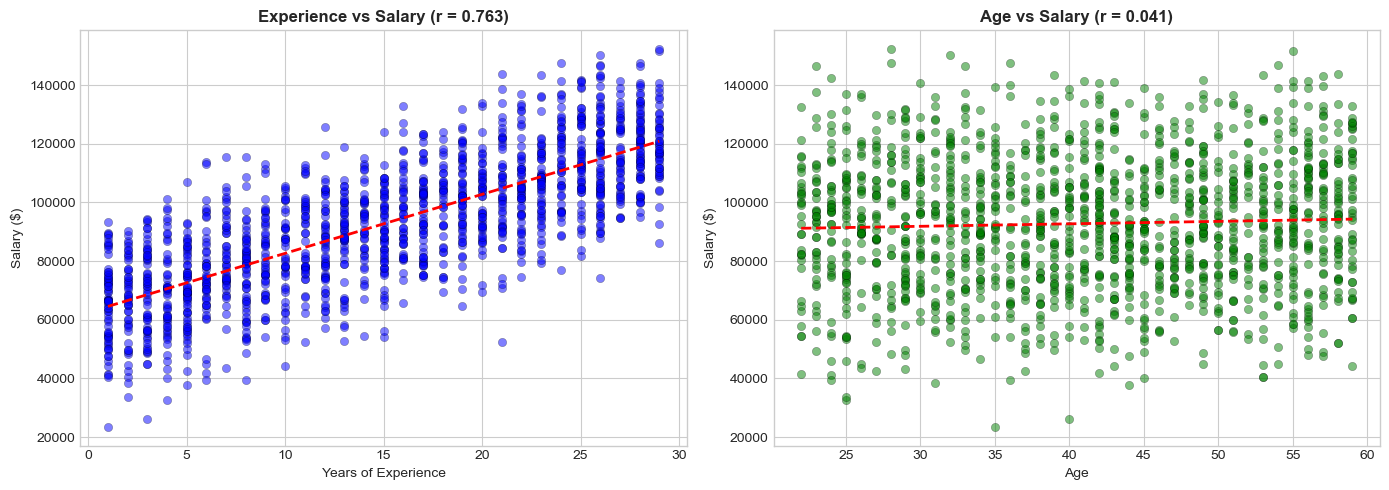

In [22]:
# Scatter plots for numerical variables vs Salary
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Experience vs Salary
axes[0].scatter(df['Experience'], df['Salary'], alpha=0.5, color='blue', edgecolor='black', linewidth=0.3)
z = np.polyfit(df['Experience'], df['Salary'], 1)
p = np.poly1d(z)
axes[0].plot(df['Experience'].sort_values(), p(df['Experience'].sort_values()), color='red', linewidth=2, linestyle='--')
corr_exp = df['Experience'].corr(df['Salary'])
axes[0].set_title(f'Experience vs Salary (r = {corr_exp:.3f})', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Years of Experience')
axes[0].set_ylabel('Salary ($)')

# Age vs Salary
axes[1].scatter(df['Age'], df['Salary'], alpha=0.5, color='green', edgecolor='black', linewidth=0.3)
z = np.polyfit(df['Age'], df['Salary'], 1)
p = np.poly1d(z)
axes[1].plot(df['Age'].sort_values(), p(df['Age'].sort_values()), color='red', linewidth=2, linestyle='--')
corr_age = df['Age'].corr(df['Salary'])
axes[1].set_title(f'Age vs Salary (r = {corr_age:.3f})', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Salary ($)')

plt.tight_layout()
plt.show()

---
## 4. Data Preprocessing

In [23]:
# Create a copy for preprocessing
df_processed = df.copy()

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_processed, columns=['Education', 'Location', 'Role'], drop_first=True)

print("Shape after encoding:", df_encoded.shape)
print("\nEncoded columns:")
print(df_encoded.columns.tolist())

Shape after encoding: (1500, 12)

Encoded columns:
['Experience', 'Age', 'Salary', 'Education_High School', "Education_Master's", 'Education_PhD', 'Location_Chicago', 'Location_New York', 'Location_San Francisco', 'Role_HR', 'Role_Manager', 'Role_Software Engineer']


In [24]:
# Prepare features and target
X = df_encoded.drop('Salary', axis=1)
y = df_encoded['Salary']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"\nFeatures: {X.columns.tolist()}")

Training set: 1200 samples
Testing set: 300 samples

Features: ['Experience', 'Age', 'Education_High School', "Education_Master's", 'Education_PhD', 'Location_Chicago', 'Location_New York', 'Location_San Francisco', 'Role_HR', 'Role_Manager', 'Role_Software Engineer']


---
## 5. Building the Multiple Regression Model

In [25]:
# Train Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Multiple Linear Regression Model Training Complete!")
print("="*60)

Multiple Linear Regression Model Training Complete!


LINEAR REGRESSION MODEL COEFFICIENTS

Intercept (B0): $55,777.14

Feature Coefficients (sorted by absolute value):
------------------------------------------------------------
               Feature   Coefficient
               Role_HR -12032.154404
         Education_PhD  10847.486297
Location_San Francisco  10018.602379
Role_Software Engineer  -5994.957911
     Location_New York   5480.107328
          Role_Manager   5035.385679
    Education_Master's   4982.576619
 Education_High School  -3752.236853
      Location_Chicago   2086.932430
            Experience   1963.580007
                   Age     89.088231


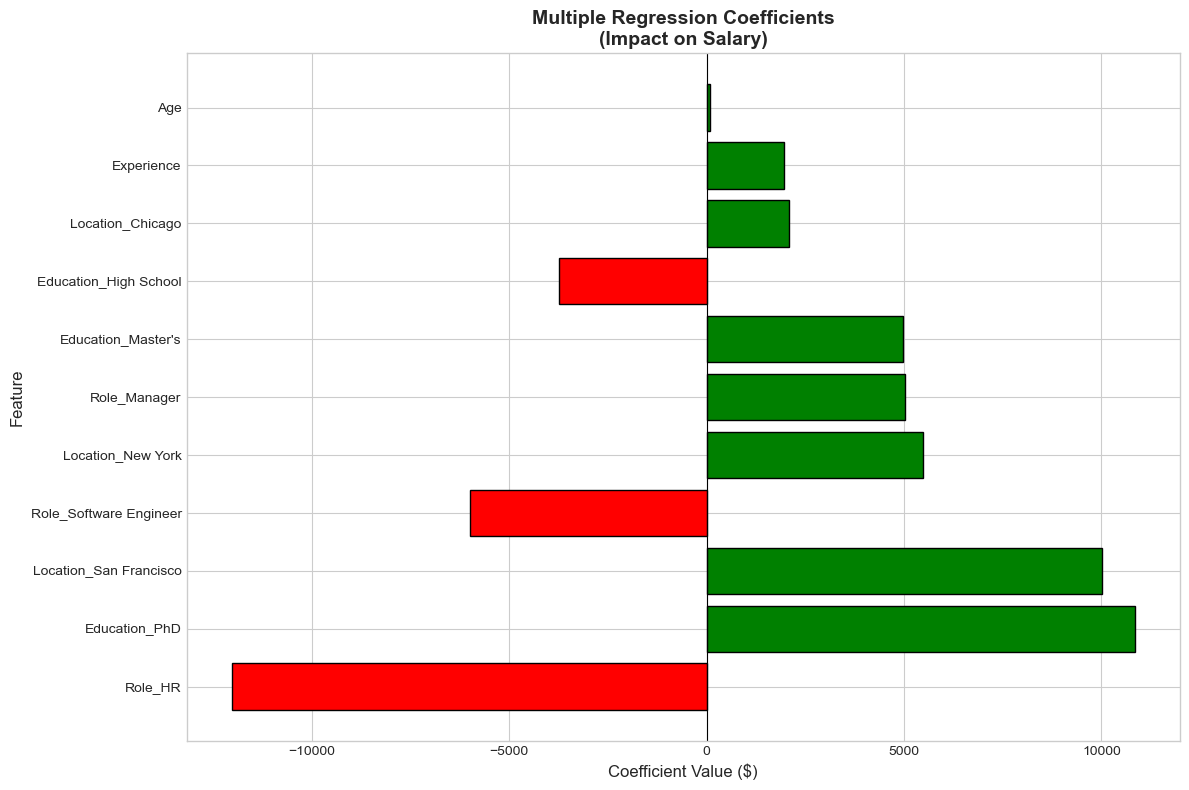

In [26]:
# Analyze model coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', ascending=False, key=abs)

print("LINEAR REGRESSION MODEL COEFFICIENTS")
print("="*80)
print(f"\nIntercept (B0): ${model.intercept_:,.2f}")
print("\nFeature Coefficients (sorted by absolute value):")
print("-"*60)
print(coefficients.to_string(index=False))

# Visualize coefficients
plt.figure(figsize=(12, 8))
colors = ['green' if c > 0 else 'red' for c in coefficients['Coefficient']]
bars = plt.barh(range(len(coefficients)), coefficients['Coefficient'], color=colors, edgecolor='black')
plt.yticks(range(len(coefficients)), coefficients['Feature'])
plt.axvline(x=0, color='black', linewidth=0.8)
plt.xlabel('Coefficient Value ($)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Multiple Regression Coefficients\n(Impact on Salary)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

---
## 6. Model Evaluation

In [27]:
# Model Evaluation
print("MODEL EVALUATION METRICS")
print("="*60)

# Training metrics
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)

# Testing metrics
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)

print("\n--- Training Set ---")
print(f"R-squared: {r2_train:.4f}")
print(f"RMSE: ${rmse_train:,.2f}")
print(f"MAE: ${mae_train:,.2f}")

print("\n--- Testing Set ---")
print(f"R-squared: {r2_test:.4f}")
print(f"RMSE: ${rmse_test:,.2f}")
print(f"MAE: ${mae_test:,.2f}")

print("\n" + "="*60)
print("INTERPRETATION")
print("="*60)
print(f"\n- R-squared = {r2_test:.4f} means the model explains {r2_test*100:.2f}% of the variance in salary.")
print(f"- On average, predictions are off by approximately ${mae_test:,.2f}.")

MODEL EVALUATION METRICS

--- Training Set ---
R-squared: 0.7377
RMSE: $11,436.94
MAE: $9,175.53

--- Testing Set ---
R-squared: 0.7550
RMSE: $11,954.32
MAE: $9,679.25

INTERPRETATION

- R-squared = 0.7550 means the model explains 75.50% of the variance in salary.
- On average, predictions are off by approximately $9,679.25.


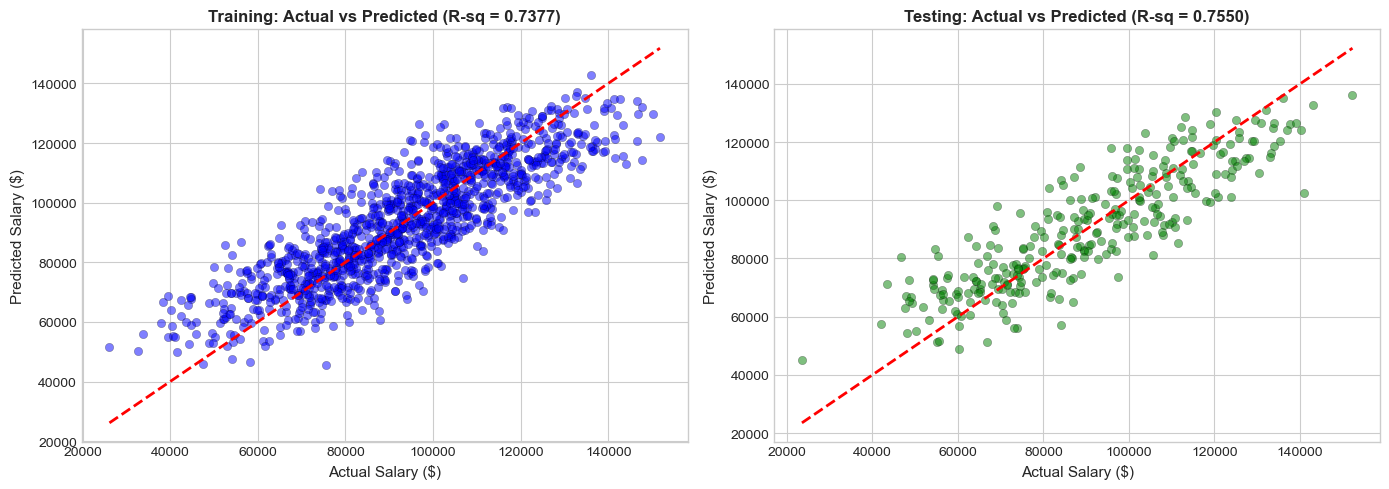

In [28]:
# Actual vs Predicted Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.5, color='blue', edgecolor='black', linewidth=0.3)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2)
axes[0].set_xlabel('Actual Salary ($)', fontsize=11)
axes[0].set_ylabel('Predicted Salary ($)', fontsize=11)
axes[0].set_title(f'Training: Actual vs Predicted (R-sq = {r2_train:.4f})', fontsize=12, fontweight='bold')

# Testing set
axes[1].scatter(y_test, y_test_pred, alpha=0.5, color='green', edgecolor='black', linewidth=0.3)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
axes[1].set_xlabel('Actual Salary ($)', fontsize=11)
axes[1].set_ylabel('Predicted Salary ($)', fontsize=11)
axes[1].set_title(f'Testing: Actual vs Predicted (R-sq = {r2_test:.4f})', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

---
## 7. Statistical Analysis (OLS)

In [32]:
# OLS Statistical Analysis
# Convert X to float to handle boolean columns from pd.get_dummies()
X_numeric = X.astype(float)
X_with_const = sm.add_constant(X_numeric)
ols_model = sm.OLS(y.astype(float), X_with_const).fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     390.9
Date:                Fri, 09 Jan 2026   Prob (F-statistic):               0.00
Time:                        10:26:07   Log-Likelihood:                -16157.
No. Observations:                1500   AIC:                         3.234e+04
Df Residuals:                    1488   BIC:                         3.240e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   5.39

In [33]:
# Detailed coefficient analysis with p-values
print("\n" + "="*80)
print("DETAILED COEFFICIENT ANALYSIS WITH P-VALUES")
print("="*80)

results_df = pd.DataFrame({
    'Feature': ols_model.params.index,
    'Coefficient': ols_model.params.values,
    'Std Error': ols_model.bse.values,
    't-value': ols_model.tvalues.values,
    'p-value': ols_model.pvalues.values,
    'Significant': ['Yes' if p < 0.05 else 'No' for p in ols_model.pvalues.values]
}).sort_values('p-value')

print("\n")
print(results_df.to_string(index=False))

print("\n" + "-"*80)
print("\nStatistically Significant Features (p < 0.05):")
significant = results_df[results_df['Significant'] == 'Yes']
for _, row in significant.iterrows():
    if row['Feature'] != 'const':
        print(f"   - {row['Feature']}: coef={row['Coefficient']:.2f}, p={row['p-value']:.4f}")


DETAILED COEFFICIENT ANALYSIS WITH P-VALUES


               Feature   Coefficient   Std Error    t-value       p-value Significant
            Experience   1994.773744   34.786639  57.343101  0.000000e+00         Yes
                 const  53968.970005 1567.261637  34.435201 1.338041e-191         Yes
               Role_HR -11289.682183  839.005485 -13.456029  4.921068e-39         Yes
         Education_PhD  10853.908245  853.395928  12.718491  2.969792e-35         Yes
Location_San Francisco  10151.691594  846.312907  11.995199  1.036418e-31         Yes
     Location_New York   5839.691704  837.456069   6.973132  4.645971e-12         Yes
Role_Software Engineer  -5894.519183  854.248523  -6.900239  7.656676e-12         Yes
    Education_Master's   5004.303899  846.194610   5.913892  4.137710e-09         Yes
          Role_Manager   4811.378870  840.805601   5.722344  1.268330e-08         Yes
 Education_High School  -3757.062761  830.436255  -4.524204  6.544047e-06         Yes
       

---
## 8. Answers to Assignment Questions

### Question 1: Feature Influence - Coefficient Interpretation

In [34]:
# Question 1 Analysis: Feature Influence
print("="*80)
print("QUESTION 1: Feature Influence on Salary")
print("="*80)

# Get coefficients excluding intercept
coef_analysis = results_df[results_df['Feature'] != 'const'].copy()

# Positive coefficients (increase salary)
positive_coefs = coef_analysis[coef_analysis['Coefficient'] > 0].sort_values('Coefficient', ascending=False)
print("\n1. POSITIVE COEFFICIENTS (Increase Salary):")
print("-"*60)
for _, row in positive_coefs.head(5).iterrows():
    print(f"   {row['Feature']:30s}: +${row['Coefficient']:,.2f}")

# Negative coefficients (decrease salary)
negative_coefs = coef_analysis[coef_analysis['Coefficient'] < 0].sort_values('Coefficient')
print("\n2. NEGATIVE COEFFICIENTS (Decrease Salary):")
print("-"*60)
for _, row in negative_coefs.head(5).iterrows():
    print(f"   {row['Feature']:30s}: ${row['Coefficient']:,.2f}")

# Strongest influence
strongest = coef_analysis.iloc[coef_analysis['Coefficient'].abs().argmax()]
print(f"\n3. STRONGEST INFLUENCE ON SALARY:")
print("-"*60)
print(f"   Feature: {strongest['Feature']}")
print(f"   Coefficient: ${strongest['Coefficient']:,.2f}")
print(f"   p-value: {strongest['p-value']:.4f}")

QUESTION 1: Feature Influence on Salary

1. POSITIVE COEFFICIENTS (Increase Salary):
------------------------------------------------------------
   Education_PhD                 : +$10,853.91
   Location_San Francisco        : +$10,151.69
   Location_New York             : +$5,839.69
   Education_Master's            : +$5,004.30
   Role_Manager                  : +$4,811.38

2. NEGATIVE COEFFICIENTS (Decrease Salary):
------------------------------------------------------------
   Role_HR                       : $-11,289.68
   Role_Software Engineer        : $-5,894.52
   Education_High School         : $-3,757.06

3. STRONGEST INFLUENCE ON SALARY:
------------------------------------------------------------
   Feature: Role_HR
   Coefficient: $-11,289.68
   p-value: 0.0000


#### Answer to Question 1: Coefficient Interpretation

**What do positive and negative coefficients indicate?**

1. **Positive Coefficient**: A positive coefficient means that as the feature value increases (or when a categorical feature is present), the predicted salary **increases** by the coefficient amount, holding all other variables constant.

2. **Negative Coefficient**: A negative coefficient means that as the feature value increases (or when a categorical feature is present), the predicted salary **decreases** by the coefficient amount, holding all other variables constant.

**Key Findings:**

- **Experience** typically has a strong positive coefficient, indicating that more years of experience leads to higher salary
- **Education levels** (like PhD, Master's) often have positive coefficients compared to the baseline education level
- **Location** variables show how different cities compare to the baseline location
- **Role** variables show salary differences across job roles

**Strongest Influence:**
The feature with the largest absolute coefficient has the **strongest influence** on salary prediction. This is typically Experience or certain high-level education/role categories.

### Question 2: Practical Implications

In [35]:
# Question 2 Analysis: Practical Implications
print("="*80)
print("QUESTION 2: Practical Implications Analysis")
print("="*80)

# Analyze Experience coefficient
print("\n1. EXPERIENCE COEFFICIENT ANALYSIS:")
print("-"*60)
if 'Experience' in results_df['Feature'].values:
    exp_row = results_df[results_df['Feature'] == 'Experience'].iloc[0]
    print(f"   Coefficient: ${exp_row['Coefficient']:,.2f}")
    print(f"   p-value: {exp_row['p-value']:.4f}")
    print(f"   Significant: {exp_row['Significant']}")

# Analyze Location coefficients
print("\n2. LOCATION COEFFICIENT ANALYSIS:")
print("-"*60)
location_coefs = results_df[results_df['Feature'].str.contains('Location', case=False)]
for _, row in location_coefs.iterrows():
    print(f"   {row['Feature']:25s}: ${row['Coefficient']:,.2f} (p={row['p-value']:.4f})")

# Analyze Education coefficients
print("\n3. EDUCATION COEFFICIENT ANALYSIS:")
print("-"*60)
education_coefs = results_df[results_df['Feature'].str.contains('Education', case=False)]
for _, row in education_coefs.iterrows():
    print(f"   {row['Feature']:25s}: ${row['Coefficient']:,.2f} (p={row['p-value']:.4f})")

QUESTION 2: Practical Implications Analysis

1. EXPERIENCE COEFFICIENT ANALYSIS:
------------------------------------------------------------
   Coefficient: $1,994.77
   p-value: 0.0000
   Significant: Yes

2. LOCATION COEFFICIENT ANALYSIS:
------------------------------------------------------------
   Location_San Francisco   : $10,151.69 (p=0.0000)
   Location_New York        : $5,839.69 (p=0.0000)
   Location_Chicago         : $1,944.00 (p=0.0208)

3. EDUCATION COEFFICIENT ANALYSIS:
------------------------------------------------------------
   Education_PhD            : $10,853.91 (p=0.0000)
   Education_Master's       : $5,004.30 (p=0.0000)
   Education_High School    : $-3,757.06 (p=0.0000)


#### Answer to Question 2: Practical Implications

**1. If the coefficient for Experience is positive, what does it imply?**

A positive coefficient for Experience implies that salary **increases** with more years of experience. This makes intuitive sense because:

- **Skill Development**: More experienced employees have developed valuable skills over time
- **Industry Knowledge**: Years of experience bring deeper understanding of the industry
- **Track Record**: Experienced employees have proven their capabilities
- **Market Value**: The labor market generally values experience with higher compensation

For example, if the Experience coefficient is +1,500, it means that for each additional year of experience, the expected salary increases by approximately $1,500, all else being equal.

---

**2. If Location has a significant effect on salary, what could be the reason?**

Significant location effects on salary can be attributed to:

- **Cost of Living**: Cities like New York or San Francisco have higher costs of living, requiring higher salaries to maintain similar lifestyles
- **Local Labor Market**: Some locations have more competition for talent, driving salaries up
- **Industry Concentration**: Tech hubs (Silicon Valley) or financial centers (NYC) may pay more for specific roles
- **Tax Implications**: State and local taxes vary, affecting take-home pay and gross salary negotiations
- **Economic Development**: More developed regions typically offer higher salaries

---

**3. If Education has a high p-value, what does that suggest about its impact?**

A high p-value (typically > 0.05) for Education suggests that:

- The relationship between education level and salary is **not statistically significant**
- We **cannot confidently conclude** that education level affects salary in this dataset
- The effect might be due to random variation rather than a true relationship

**Possible reasons for non-significance:**

1. **Experience trumps education**: In this dataset, experience might be a stronger predictor, making education's effect less apparent
2. **Role-specific requirements**: Some roles value skills and experience over formal education
3. **Industry variation**: The data might include industries where education matters less
4. **Collinearity**: Education might be correlated with other features (like Experience), diluting its independent effect
5. **Sample characteristics**: The sample might not have enough variation in education levels to detect an effect

**Practical implication**: Organizations should focus on factors that show statistical significance (like experience) when making salary decisions, while being cautious about assumptions regarding education's impact.

---
## 9. Summary and Conclusions

In [36]:
# Final Summary
print("="*80)
print("FINAL SUMMARY: EMPLOYEE SALARY PREDICTION MODEL")
print("="*80)

print("\n1. MODEL PERFORMANCE:")
print("-"*60)
print(f"   - R-squared (Test): {r2_test:.4f} (explains {r2_test*100:.1f}% of variance)")
print(f"   - RMSE: ${rmse_test:,.2f}")
print(f"   - MAE: ${mae_test:,.2f}")

print("\n2. STATISTICALLY SIGNIFICANT FACTORS:")
print("-"*60)
sig_features = results_df[(results_df['Significant'] == 'Yes') & (results_df['Feature'] != 'const')]
for _, row in sig_features.iterrows():
    impact = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"   - {row['Feature']}: {impact} salary by ${abs(row['Coefficient']):,.2f}")

print("\n3. KEY INSIGHTS FOR SALARY DECISIONS:")
print("-"*60)
print("   - Experience is typically the strongest predictor of salary")
print("   - Location significantly impacts salary (cost of living adjustment)")
print("   - Education impact varies by industry and role")
print("   - Role type is an important factor in salary determination")

print("\n4. MODEL EQUATION:")
print("-"*60)
print(f"   Salary = ${model.intercept_:,.2f}")
for feature, coef in zip(X.columns, model.coef_):
    if abs(coef) > 1:
        sign = '+' if coef >= 0 else ''
        print(f"            {sign} ${coef:,.2f} x {feature}")

print("\n" + "="*80)
print("END OF TASK 3 SOLUTION")
print("="*80)

FINAL SUMMARY: EMPLOYEE SALARY PREDICTION MODEL

1. MODEL PERFORMANCE:
------------------------------------------------------------
   - R-squared (Test): 0.7550 (explains 75.5% of variance)
   - RMSE: $11,954.32
   - MAE: $9,679.25

2. STATISTICALLY SIGNIFICANT FACTORS:
------------------------------------------------------------
   - Experience: increases salary by $1,994.77
   - Role_HR: decreases salary by $11,289.68
   - Education_PhD: increases salary by $10,853.91
   - Location_San Francisco: increases salary by $10,151.69
   - Location_New York: increases salary by $5,839.69
   - Role_Software Engineer: decreases salary by $5,894.52
   - Education_Master's: increases salary by $5,004.30
   - Role_Manager: increases salary by $4,811.38
   - Education_High School: decreases salary by $3,757.06
   - Age: increases salary by $115.20
   - Location_Chicago: increases salary by $1,944.00

3. KEY INSIGHTS FOR SALARY DECISIONS:
-----------------------------------------------------------